In [2]:
library(dplyr)
library(imager)
library(pracma)
library(EBImage)

In [4]:
n <- 256
w <- exp(-1i * 2 * pi / n)

DFT <- matrix( rep(0, n*n), nrow=n, ncol=n )

# Slow
for (i in 1:n){
    for (k in 1:n) {
        DFT[i,k] = w^(i*k)
    }
}

DFT = Re(DFT)
DFT

0.9996988,0.99879546,0.99729046,9.951847e-01,0.99247953,0.98917651,0.98527764,9.807853e-01,0.97570213,0.97003125,⋯,0.97570213,9.807853e-01,0.98527764,0.98917651,0.99247953,9.951847e-01,0.99729046,0.99879546,0.9996988,1
0.9987955,0.99518473,0.98917651,9.807853e-01,0.97003125,0.95694034,0.94154407,9.238795e-01,0.90398929,0.88192126,⋯,0.90398929,9.238795e-01,0.94154407,0.95694034,0.97003125,9.807853e-01,0.98917651,0.99518473,0.9987955,1
0.9972905,0.98917651,0.97570213,9.569403e-01,0.93299280,0.90398929,0.87008699,8.314696e-01,0.78834643,0.74095113,⋯,0.78834643,8.314696e-01,0.87008699,0.90398929,0.93299280,9.569403e-01,0.97570213,0.98917651,0.9972905,1
0.9951847,0.98078528,0.95694034,9.238795e-01,0.88192126,0.83146961,0.77301045,7.071068e-01,0.63439328,0.55557023,⋯,0.63439328,7.071068e-01,0.77301045,0.83146961,0.88192126,9.238795e-01,0.95694034,0.98078528,0.9951847,1
0.9924795,0.97003125,0.93299280,8.819213e-01,0.81758481,0.74095113,0.65317284,5.555702e-01,0.44961133,0.33688985,⋯,0.44961133,5.555702e-01,0.65317284,0.74095113,0.81758481,8.819213e-01,0.93299280,0.97003125,0.9924795,1
0.9891765,0.95694034,0.90398929,8.314696e-01,0.74095113,0.63439328,0.51410274,3.826834e-01,0.24298018,0.09801714,⋯,0.24298018,3.826834e-01,0.51410274,0.63439328,0.74095113,8.314696e-01,0.90398929,0.95694034,0.9891765,1
0.9852776,0.94154407,0.87008699,7.730105e-01,0.65317284,0.51410274,0.35989504,1.950903e-01,0.02454123,-0.14673047,⋯,0.02454123,1.950903e-01,0.35989504,0.51410274,0.65317284,7.730105e-01,0.87008699,0.94154407,0.9852776,1
0.9807853,0.92387953,0.83146961,7.071068e-01,0.55557023,0.38268343,0.19509032,2.220446e-16,-0.19509032,-0.38268343,⋯,-0.19509032,-6.883383e-15,0.19509032,0.38268343,0.55557023,7.071068e-01,0.83146961,0.92387953,0.9807853,1
0.9757021,0.90398929,0.78834643,6.343933e-01,0.44961133,0.24298018,0.02454123,-1.950903e-01,-0.40524131,-0.59569930,⋯,-0.40524131,-1.950903e-01,0.02454123,0.24298018,0.44961133,6.343933e-01,0.78834643,0.90398929,0.9757021,1
0.9700313,0.88192126,0.74095113,5.555702e-01,0.33688985,0.09801714,-0.14673047,-3.826834e-01,-0.59569930,-0.77301045,⋯,-0.59569930,-3.826834e-01,-0.14673047,0.09801714,0.33688985,5.555702e-01,0.74095113,0.88192126,0.9700313,1
0.9637761,0.85772861,0.68954054,4.713967e-01,0.21910124,-0.04906767,-0.31368174,-5.555702e-01,-0.75720885,-0.90398929,⋯,-0.75720885,-5.555702e-01,-0.31368174,-0.04906767,0.21910124,4.713967e-01,0.68954054,0.85772861,0.9637761,1


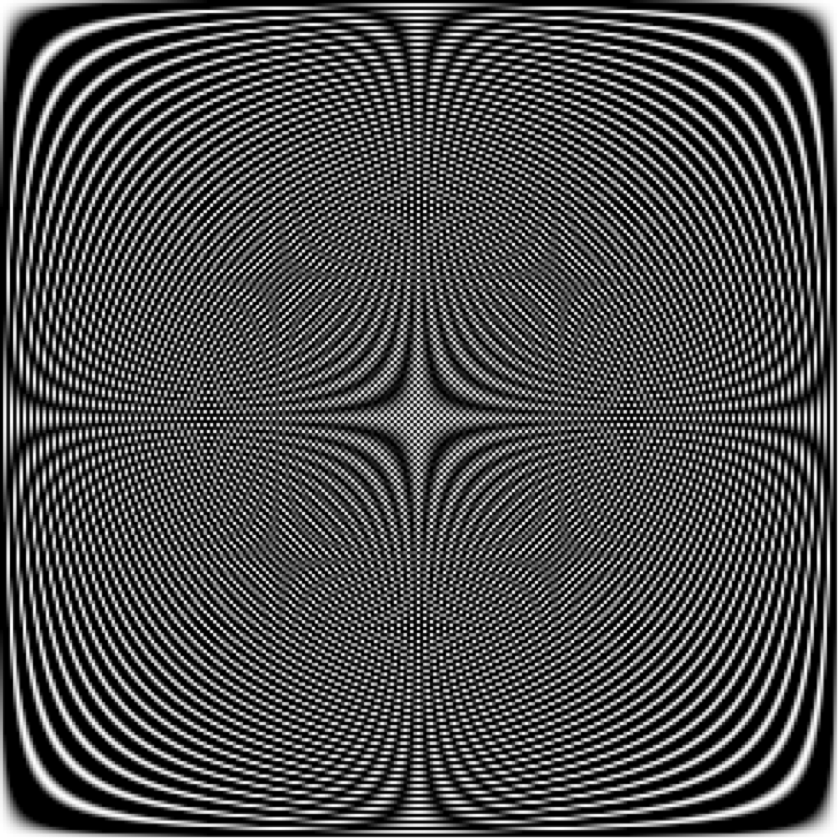

In [5]:
display(DFT)

In [10]:
# Fast
DFT <- outer(0:(n-1), 0:(n-1), function(i, j) w^(i*j))

DFT = Re(DFT)
DFT

1,1.0000000,1.0000000,1.00000000,1.000000e+00,1.00000000,1.00000000,1.00000000,1.000000e+00,1.00000000,⋯,1.00000000,1.00000000,1.000000e+00,1.00000000,1.00000000,1.00000000,1.000000e+00,1.00000000,1.0000000,1.0000000
1,0.9996988,0.9987955,0.99729046,9.951847e-01,0.99247953,0.98917651,0.98527764,9.807853e-01,0.97570213,⋯,0.97003125,0.97570213,9.807853e-01,0.98527764,0.98917651,0.99247953,9.951847e-01,0.99729046,0.9987955,0.9996988
1,0.9987955,0.9951847,0.98917651,9.807853e-01,0.97003125,0.95694034,0.94154407,9.238795e-01,0.90398929,⋯,0.88192126,0.90398929,9.238795e-01,0.94154407,0.95694034,0.97003125,9.807853e-01,0.98917651,0.9951847,0.9987955
1,0.9972905,0.9891765,0.97570213,9.569403e-01,0.93299280,0.90398929,0.87008699,8.314696e-01,0.78834643,⋯,0.74095113,0.78834643,8.314696e-01,0.87008699,0.90398929,0.93299280,9.569403e-01,0.97570213,0.9891765,0.9972905
1,0.9951847,0.9807853,0.95694034,9.238795e-01,0.88192126,0.83146961,0.77301045,7.071068e-01,0.63439328,⋯,0.55557023,0.63439328,7.071068e-01,0.77301045,0.83146961,0.88192126,9.238795e-01,0.95694034,0.9807853,0.9951847
1,0.9924795,0.9700313,0.93299280,8.819213e-01,0.81758481,0.74095113,0.65317284,5.555702e-01,0.44961133,⋯,0.33688985,0.44961133,5.555702e-01,0.65317284,0.74095113,0.81758481,8.819213e-01,0.93299280,0.9700313,0.9924795
1,0.9891765,0.9569403,0.90398929,8.314696e-01,0.74095113,0.63439328,0.51410274,3.826834e-01,0.24298018,⋯,0.09801714,0.24298018,3.826834e-01,0.51410274,0.63439328,0.74095113,8.314696e-01,0.90398929,0.9569403,0.9891765
1,0.9852776,0.9415441,0.87008699,7.730105e-01,0.65317284,0.51410274,0.35989504,1.950903e-01,0.02454123,⋯,-0.14673047,0.02454123,1.950903e-01,0.35989504,0.51410274,0.65317284,7.730105e-01,0.87008699,0.9415441,0.9852776
1,0.9807853,0.9238795,0.83146961,7.071068e-01,0.55557023,0.38268343,0.19509032,2.220446e-16,-0.19509032,⋯,-0.38268343,-0.19509032,-6.883383e-15,0.19509032,0.38268343,0.55557023,7.071068e-01,0.83146961,0.9238795,0.9807853
1,0.9757021,0.9039893,0.78834643,6.343933e-01,0.44961133,0.24298018,0.02454123,-1.950903e-01,-0.40524131,⋯,-0.59569930,-0.40524131,-1.950903e-01,0.02454123,0.24298018,0.44961133,6.343933e-01,0.78834643,0.9039893,0.9757021
1,0.9700313,0.8819213,0.74095113,5.555702e-01,0.33688985,0.09801714,-0.14673047,-3.826834e-01,-0.59569930,⋯,-0.77301045,-0.59569930,-3.826834e-01,-0.14673047,0.09801714,0.33688985,5.555702e-01,0.74095113,0.8819213,0.9700313


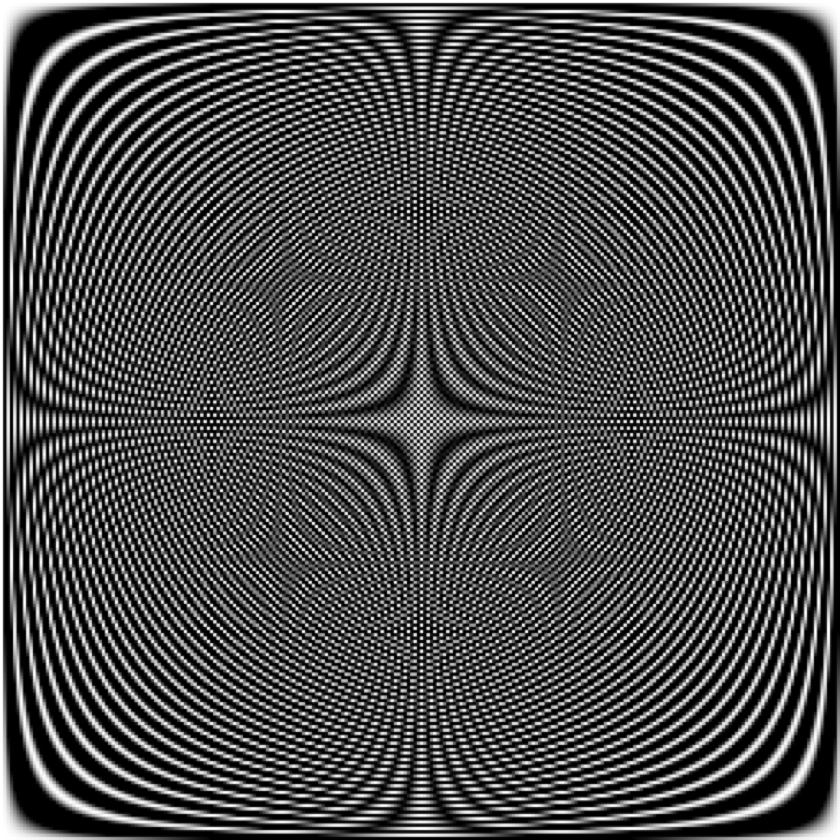

In [12]:
display(DFT)